In [ ]:
!pip install numpy==1.24.4
!pip install pandas==2.0.3
!pip install matplotlib==3.7.2
!pip install seaborn==0.12.2
!pip install scikit-learn==1.3.0
!pip install statsmodels==0.14.0
!pip install xlrd== 2.0.1

In [62]:
##LOAD THE REQUIRED LIBRARIES

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import statsmodels 
from statsmodels import api as sm
import os
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')

# ACCOUNT RECEIVABLE DATA

In [63]:
customers_data = pd.read_excel("customers_data.xls")
receivables_data = pd.read_excel("receivables_data.xls")

In [64]:
df = receivables_data.copy()

In [65]:
df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.28,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.86,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST
3,CA02,140105686,SYSC llc,01/00/1900,2020,2020-03-30,2020-04-10,11,CAD,3300,USD,2441.78,CA10,2960623488.00,1,2,100000,2020-03-26,SOUTHWEST
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.29,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST


In [66]:
#Convert date time
df.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int64
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int64
DUNNLEVEL                          int64
Credit_limit                       int64
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [67]:
##Convert the required columns to datetime
df['Posting_Date'] = pd.to_datetime(df['Posting_Date'], format = '%m/%d/%Y')
df['Due_Date'] = pd.to_datetime(df['Due_Date'], format = '%m/%d/%Y')
df['Baseline_Date'] = pd.to_datetime(df['Baseline_Date'], format = '%m/%d/%Y')

In [68]:
# Convert the  column from string to integer
df['Total Open Amount_USD'] = df['Total Open Amount_USD'].astype(float).round(1)
df['Payterm'] = df['Payterm'].astype(int)
df['DUNNLEVEL'] = df['DUNNLEVEL'].astype(int)
df['Is Open'] = df['Is Open'].astype(int)
df['Credit_limit'] = df['Credit_limit'].astype(int)

In [69]:
#to check the count
df['Is Open'].value_counts()

Is Open
0    40000
1    10000
Name: count, dtype: int64

In [70]:
rslt_df = df.loc[df['Is Open'] == 0]

In [71]:
rslt_df.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date                      object
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int32
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int32
DUNNLEVEL                          int32
Credit_limit                       int32
Baseline_Date             datetime64[ns]
Region                            object
dtype: object

In [72]:
# Adding id as an added column
rslt_df['ID'] = range(1, len(rslt_df) + 1)

In [73]:
rslt_df

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,USD_CURRENNCY,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020,2020-01-26,2020-02-10,15,USD,54273,USD,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019,2019-07-22,2019-08-11,20,USD,79657,USD,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019,2019-09-14,2019-09-29,15,USD,2254,USD,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3
4,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019,2019-11-13,2019-11-28,15,USD,33133,USD,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4
5,CA02,140106181,THE corporation,2019-12-04 00:00:00,2019,2019-09-20,2019-10-04,14,CAD,22226,USD,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25 00:00:00,2019,2019-07-10,2019-07-25,15,USD,84780,USD,84780.40,NAC6,1929600989.00,0,2,100000,2019-07-06,MIDWEST,39996
49996,U001,200769623,WAL-MAR co,2019-09-03 00:00:00,2019,2019-08-15,2019-08-30,15,USD,6767,USD,6766.50,NAH4,1929744070.00,0,2,100000,2019-08-11,WEST,39997
49997,U001,200772595,SAFEW associates,2020-03-05 00:00:00,2020,2020-02-19,2020-03-05,15,USD,6121,USD,6120.90,NAA8,1930536775.00,0,1,100000,2020-02-16,SOUTHEAST,39998
49998,U001,200726979,BJ'S llc,2019-12-12 00:00:00,2019,2019-11-27,2019-12-12,15,USD,63,USD,63.50,NAA8,1930198546.00,0,0,100000,2019-11-27,MIDWEST,39999


In [74]:
for col in rslt_df:
    print(col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID
Is Open
DUNNLEVEL
Credit_limit
Baseline_Date
Region
ID


In [75]:
#converting date on which payment is made into datetime
rslt_df['Payment_Date'] = pd.to_datetime(rslt_df['Payment_Date'], format = '%m/%d/%Y')

In [76]:
rslt_df.dtypes

Business Code                     object
Customer Number                   object
Customer Name                     object
Payment_Date              datetime64[ns]
Business Year                      int64
Posting_Date              datetime64[ns]
Due_Date                  datetime64[ns]
Payterm                            int32
Invoice Currency                  object
Total Open Amount                  int64
USD_CURRENNCY                     object
Total Open Amount_USD            float64
Customer Payment Terms            object
Invoice ID                       float64
Is Open                            int32
DUNNLEVEL                          int32
Credit_limit                       int32
Baseline_Date             datetime64[ns]
Region                            object
ID                                 int64
dtype: object

In [77]:
##Calculate Aging
rslt_df['Payment_flag'] = rslt_df['Due_Date'] - rslt_df['Payment_Date']

In [78]:
#check for head
rslt_df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID,Payment_flag
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1,-1 days
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2,3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3,-92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4,3 days
5,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5,-61 days


In [79]:
#convert aging which is our y variable into integer (continous variable)
rslt_df['Payment_flag'] = pd.to_numeric(rslt_df['Payment_flag'].dt.days, downcast='integer')

In [80]:
rslt_df.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Total Open Amount_USD,Customer Payment Terms,Invoice ID,Is Open,DUNNLEVEL,Credit_limit,Baseline_Date,Region,ID,Payment_flag
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,54273.30,NAH4,1930438491.00,0,0,50000,2020-01-23,WEST,1,-1
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,79656.60,NAD1,1929646410.00,0,2,50000,2019-07-20,MIDWEST,2,3
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,2253.90,NAA8,1929873765.00,0,3,100000,2019-09-14,NORTHEAST,3,-92
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,33133.30,NAH4,1930147974.00,0,3,100000,2019-11-10,WEST,4,3
5,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,16447.10,CA10,2960581231.00,0,3,100000,2019-09-16,SOUTHEAST,5,-61


In [81]:
#converted payment flag into late, early and ontime flag
conditions = [
    (rslt_df['Payment_flag'] == 0 ),
    (rslt_df['Payment_flag'] < 0 ),
    (rslt_df['Payment_flag'] > 0)]
choices = ['ontime', 'late', 'early']
rslt_df['payment_flagname'] = np.select(conditions, choices, default='NA')
print(rslt_df)


      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
4              U001       200769623  WAL-MAR foundation   2019-11-25   
5              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
49994          U001       200762301        C&S WH trust   2019-07-25   
49996          U001       200769623          WAL-MAR co   2019-09-03   
49997          U001       200772595    SAFEW associates   2020-03-05   
49998          U001       200726979           BJ'S  llc   2019-12-12   
49999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [82]:
rslt_df['Is Open'].value_counts()

Is Open
0    40000
Name: count, dtype: int64

In [83]:
rslt_df['payment_flagname'].value_counts()

payment_flagname
late      16764
early     14786
ontime     8450
Name: count, dtype: int64

In [84]:
##creating customer level features
## % Late, % Early, % Amount Value
customer_pivot = rslt_df.groupby(
    ['Customer Number', 'payment_flagname']
).agg(
    {
        'Total Open Amount_USD': "sum",
    }
).reset_index()


customer_pivot_others = rslt_df.groupby(
    ['Customer Number']
).agg(
    {
        'Invoice ID': "count",
        'Credit_limit': "mean",
        'DUNNLEVEL': "mean"
    }
).reset_index()


In [85]:
customer_pivot

,Customer Number,payment_flagname,Total Open Amount_USD
0,100000048,late,124521.70
1,100000051,early,64713.30
2,100000051,late,37169.00
3,100000158,early,392.70
4,100000158,late,348493.10
...,...,...,...
1813,CCU001,late,763891.90
1814,CCU002,early,999344.50
1815,CCU002,late,2309222.90
1816,CCU002,ontime,156826.80


In [86]:

customer_pivot_others

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL
0,100000048,2,50000.00,2.50
1,100000051,3,20000.00,2.00
2,100000158,7,42857.14,1.29
3,100000217,2,20000.00,1.00
4,100000222,27,43888.89,1.63
...,...,...,...,...
1051,CC7455,4,35000.00,1.25
1052,CCCA02,444,61936.94,1.50
1053,CCU001,41,62195.12,1.29
1054,CCU002,121,60000.00,1.55


In [87]:
# pivot data 
reshaped_data = customer_pivot.pivot(index='Customer Number', columns='payment_flagname')

In [88]:
#replace and fill blank with 0
df_filled = reshaped_data.fillna(0)


In [89]:
df_filled.head()

Total Open Amount_USD                 
payment_flagname                 early      late ontime
Customer Number                                        
100000048                         0.00 124521.70   0.00
100000051                     64713.30  37169.00   0.00
100000158                       392.70 348493.10   0.00
100000217                     60523.80      0.00   0.00
100000222                    808406.90   2588.60   0.00

In [90]:
for col in df_filled:
    print(col)

('Total Open Amount_USD', 'early')
('Total Open Amount_USD', 'late')
('Total Open Amount_USD', 'ontime')


In [91]:
#rename column name
new_column_names = {'early': 'TA_ Early','late': 'TA_late',
                                        'ontime': 'TA_ontime'}
df_filled.rename(columns = new_column_names,inplace = True)
print(df_filled)

                 Total Open Amount_USD                     
payment_flagname             TA_ Early    TA_late TA_ontime
Customer Number                                            
100000048                         0.00  124521.70      0.00
100000051                     64713.30   37169.00      0.00
100000158                       392.70  348493.10      0.00
100000217                     60523.80       0.00      0.00
100000222                    808406.90    2588.60      0.00
...                                ...        ...       ...
CC7455                            0.00   71914.20      0.00
CCCA02                      2291412.20 6933041.40 504350.30
CCU001                       361722.10  763891.90      0.00
CCU002                       999344.50 2309222.90 156826.80
CCU013                            0.00 8080937.20      0.00

[1056 rows x 3 columns]


In [92]:
# Calculate row sums
row_sums= df_filled.sum(axis=1)

In [93]:
#take feature into percentages
df_row_percent = df_filled.div(row_sums, axis=0) * 100

In [94]:
df_row_percent.reset_index(level=['Customer Number'])

Customer Number Total Open Amount_USD                  
payment_flagname                             TA_ Early TA_late TA_ontime
0                      100000048                  0.00  100.00      0.00
1                      100000051                 63.52   36.48      0.00
2                      100000158                  0.11   99.89      0.00
3                      100000217                100.00    0.00      0.00
4                      100000222                 99.68    0.32      0.00
...                          ...                   ...     ...       ...
1051                      CC7455                  0.00  100.00      0.00
1052                      CCCA02                 23.55   71.26      5.18
1053                      CCU001                 32.14   67.86      0.00
1054                      CCU002                 28.84   66.64      4.53
1055                      CCU013                  0.00  100.00      0.00

[1056 rows x 4 columns]

In [95]:
df_row_percent = df_row_percent.reset_index(level=("Customer Number",))

In [96]:
df_row_percent.columns

MultiIndex([(      'Customer Number',          ''),
            ('Total Open Amount_USD', 'TA_ Early'),
            ('Total Open Amount_USD',   'TA_late'),
            ('Total Open Amount_USD', 'TA_ontime')],
           names=[None, 'payment_flagname'])

In [97]:
#view the remaining features at customer level
customer_pivot_others

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL
0,100000048,2,50000.00,2.50
1,100000051,3,20000.00,2.00
2,100000158,7,42857.14,1.29
3,100000217,2,20000.00,1.00
4,100000222,27,43888.89,1.63
...,...,...,...,...
1051,CC7455,4,35000.00,1.25
1052,CCCA02,444,61936.94,1.50
1053,CCU001,41,62195.12,1.29
1054,CCU002,121,60000.00,1.55


In [98]:
df_row_percent.columns = [' '.join(col).strip() for col in df_row_percent.columns.values]


In [99]:
merged_df = pd.merge(customer_pivot_others, df_row_percent, on='Customer Number')

In [100]:
merged_df.head()

,Customer Number,Invoice ID,Credit_limit,DUNNLEVEL,Total Open Amount_USD TA_ Early,Total Open Amount_USD TA_late,Total Open Amount_USD TA_ontime
0,100000048,2,50000.00,2.50,0.00,100.00,0.00
1,100000051,3,20000.00,2.00,63.52,36.48,0.00
2,100000158,7,42857.14,1.29,0.11,99.89,0.00
3,100000217,2,20000.00,1.00,100.00,0.00,0.00
4,100000222,27,43888.89,1.63,99.68,0.32,0.00


In [101]:
##Join invoice level features with customer data
Masterdata = pd.merge(rslt_df, merged_df, on='Customer Number', how='left')

# Print the master DataFrame
print(Masterdata)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [102]:
##create more invoice level features
Masterdata.dtypes
# Convert the integer column to string
Masterdata['Payterm'] = Masterdata['Payterm'].astype(int)

In [103]:
## count to check late,early and ontime
Masterdata['payment_flagname'].value_counts()

payment_flagname
late      16764
early     14786
ontime     8450
Name: count, dtype: int64

In [104]:
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,Region,ID,Payment_flag,payment_flagname,Invoice ID_y,Credit_limit_y,DUNNLEVEL_y,Total Open Amount_USD TA_ Early,Total Open Amount_USD TA_late,Total Open Amount_USD TA_ontime
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,WEST,1,-1,late,9581,81421.56,1.52,84.43,14.51,1.06
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,MIDWEST,2,3,early,54,42777.78,1.46,97.71,0.00,2.29
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,NORTHEAST,3,-92,late,158,95569.62,1.54,34.33,30.84,34.83
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,WEST,4,3,early,9581,81421.56,1.52,84.43,14.51,1.06
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,SOUTHEAST,5,-61,late,100,67800.00,1.53,0.16,99.84,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,MIDWEST,39996,0,ontime,1225,100000.00,1.49,8.37,30.74,60.89
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,WEST,39997,-4,late,9581,81421.56,1.52,84.43,14.51,1.06
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,SOUTHEAST,39998,0,ontime,248,100000.00,1.49,0.00,46.98,53.02
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,MIDWEST,39999,0,ontime,1612,82040.94,1.50,1.93,50.84,47.23


In [105]:
# Convert the categorical column into dummy variables
dummy_df= pd.get_dummies(Masterdata['Region'])

In [106]:
Masterdata = pd.concat([Masterdata, dummy_df], axis=1)
# Print the updated DataFrame
print(Masterdata)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [107]:
#feature at invoice level
Masterdata['diff_PB'] = Masterdata['Posting_Date'] - Masterdata['Baseline_Date']


In [108]:
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,Total Open Amount_USD TA_ Early,Total Open Amount_USD TA_late,Total Open Amount_USD TA_ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3 days
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,True,False,False,False,False,2 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,False,True,False,False,False,0 days
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3 days
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,False,False,True,False,False,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,1.49,8.37,30.74,60.89,True,False,False,False,False,4 days
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,1.52,84.43,14.51,1.06,False,False,False,False,True,4 days
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,1.49,0.00,46.98,53.02,False,False,True,False,False,3 days
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,1.50,1.93,50.84,47.23,True,False,False,False,False,0 days


In [109]:
# Assuming you have a DataFrame called 'df' and a column called 'days'
Masterdata['diff_PB'] =  pd.to_numeric(Masterdata['diff_PB'].dt.days, downcast='integer')

In [110]:
Masterdata.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,Total Open Amount_USD TA_ Early,Total Open Amount_USD TA_late,Total Open Amount_USD TA_ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,True,False,False,False,False,2
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,False,True,False,False,False,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,False,False,True,False,False,4


In [111]:
for col in Masterdata:
    print(col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
Total Open Amount_USD TA_ Early
Total Open Amount_USD TA_late
Total Open Amount_USD TA_ontime
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB


In [112]:
Masterdata = Masterdata.rename(columns={
    'Total Open Amount_USD TA_ Early': 'TA_Early',
    'Total Open Amount_USD TA_late': 'TA_Late',
    'Total Open Amount_USD TA_ontime': 'TA_Ontime'
})


In [113]:
print(Masterdata.columns)

Index(['Business Code', 'Customer Number', 'Customer Name', 'Payment_Date',
       'Business Year', 'Posting_Date', 'Due_Date', 'Payterm',
       'Invoice Currency', 'Total Open Amount', 'USD_CURRENNCY',
       'Total Open Amount_USD', 'Customer Payment Terms', 'Invoice ID_x',
       'Is Open', 'DUNNLEVEL_x', 'Credit_limit_x', 'Baseline_Date', 'Region',
       'ID', 'Payment_flag', 'payment_flagname', 'Invoice ID_y',
       'Credit_limit_y', 'DUNNLEVEL_y', 'TA_Early', 'TA_Late', 'TA_Ontime',
       'MIDWEST', 'NORTHEAST', 'SOUTHEAST', 'SOUTHWEST', 'WEST', 'diff_PB'],
      dtype='object')


In [114]:
#features selected for model
Model_columns = Masterdata.loc[:, ['ID','Invoice ID_x', 'Payterm', 'Total Open Amount_USD','Credit_limit_x','Payment_flag','Credit_limit_y',
                          'TA_Early', 'TA_Late','TA_Ontime',
                          'MIDWEST','NORTHEAST','SOUTHEAST','SOUTHWEST','WEST','diff_PB']]

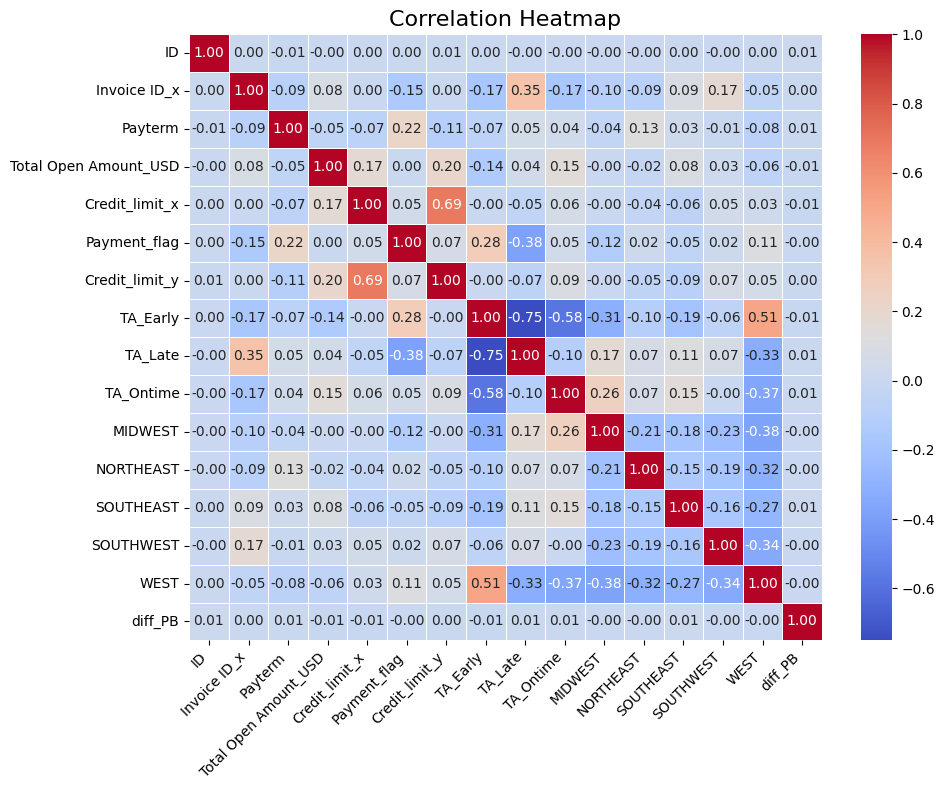

In [115]:
corr_matrix = Model_columns.corr()

# Set up the size of the heatmap for better visualization
plt.figure(figsize=(10, 8))

# Create a correlation plot using seaborn with clearer color map (coolwarm)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust the layout for better aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


## Model Building


In [116]:
#Model_columns fill blanks with 0
Model_columns_v1 = Model_columns.fillna(0)

In [117]:
Model_columns_v1.head()

,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Payment_flag,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,1,1930438491.00,15,54273.30,50000,-1,81421.56,84.43,14.51,1.06,False,False,False,False,True,3
1,2,1929646410.00,20,79656.60,50000,3,42777.78,97.71,0.00,2.29,True,False,False,False,False,2
2,3,1929873765.00,15,2253.90,100000,-92,95569.62,34.33,30.84,34.83,False,True,False,False,False,0
3,4,1930147974.00,15,33133.30,100000,3,81421.56,84.43,14.51,1.06,False,False,False,False,True,3
4,5,2960581231.00,14,16447.10,100000,-61,67800.00,0.16,99.84,0.00,False,False,True,False,False,4


In [118]:
# Assuming you have a pandas DataFrame named 'df' containing your data
Model_columns_v1

# Split the data into features (X) and target variable (y)
X = Model_columns_v1.drop('Payment_flag', axis=1)
y = Model_columns_v1['Payment_flag']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
# drop columns not required for model
X_train_wid = X_train.drop(['Invoice ID_x','ID'], axis=1)
X_test_wid = X_test.drop(['Invoice ID_x','ID'], axis=1)


In [120]:
X_test_wid

,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
32823,15,24177.00,50000,79130.43,1.63,63.40,34.97,False,False,True,False,False,1
16298,17,5208.70,100000,173207.55,44.25,47.48,8.26,False,True,False,False,False,3
28505,15,30591.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,4
6689,15,20612.40,100000,74474.47,1.79,51.44,46.77,False,False,True,False,False,2
26893,15,9216.20,5000,44375.00,84.48,13.97,1.55,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,15,481.80,100000,82040.94,1.93,50.84,47.23,True,False,False,False,False,4
11973,15,223.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,1
35668,17,133705.10,100000,100000.00,28.28,54.13,17.59,False,False,True,False,False,3
483,21,14744.00,20000,39928.32,57.46,31.31,11.23,False,False,True,False,False,3


In [123]:
# Define a list of regressors
regressors = [
    RandomForestRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    BayesianRidge(),
    GradientBoostingRegressor(),
]

best_regressor = None
best_rmse = np.inf


# Iterate over the regressors and find the best one
for regressor in regressors:
    regressor.fit(X_train_wid, y_train)
    y_pred = regressor.predict(X_test_wid)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("Regressor: ", regressor)
    print("RMSE: ", rmse)
    if rmse < best_rmse:
        best_rmse = rmse
        best_regressor = regressor

# Use the best regressor for prediction
y_pred = best_regressor.predict(X_test_wid)

# Evaluate the performance of the best regressor
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Regressor: ", best_regressor)
print("RMSE: ", rmse)

Regressor:  RandomForestRegressor()
RMSE:  7.986623692933054
Regressor:  Ridge()
RMSE:  9.461164372870442
Regressor:  Lasso()
RMSE:  9.482303403653507
Regressor:  ElasticNet()
RMSE:  9.481710897033873
Regressor:  BayesianRidge()
RMSE:  9.461034850843655
Regressor:  GradientBoostingRegressor()
RMSE:  7.574115941130635
Best Regressor:  GradientBoostingRegressor()
RMSE:  7.574115941130635


In [124]:
X_test

,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
32823,32824,1929994452.00,15,24177.00,50000,79130.43,1.63,63.40,34.97,False,False,True,False,False,1
16298,16299,1929646090.00,17,5208.70,100000,173207.55,44.25,47.48,8.26,False,True,False,False,False,3
28505,28506,1929917929.00,15,30591.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,4
6689,6690,1929830878.00,15,20612.40,100000,74474.47,1.79,51.44,46.77,False,False,True,False,False,2
26893,26894,1930548952.00,15,9216.20,5000,44375.00,84.48,13.97,1.55,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,True,False,False,False,False,4
11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,1
35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,False,False,True,False,False,3
483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,False,False,True,False,False,3


In [125]:
X_train_wid

,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
38015,12,65768.10,50000,88142.86,0.00,99.82,0.18,False,False,False,False,True,0
2281,11,35203.60,100000,78873.24,0.35,99.61,0.04,False,False,False,True,False,1
36629,15,13125.10,50000,81421.56,84.43,14.51,1.06,False,False,False,False,True,3
6087,36,17741.30,100000,62195.12,32.14,67.86,0.00,False,False,False,False,True,1
11792,15,2121.90,10000,6346.15,3.38,11.67,84.95,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,15,1388.90,100000,100000.00,1.44,74.79,23.77,False,False,True,False,False,0
11284,15,35601.40,20000,20000.00,0.00,0.00,100.00,False,True,False,False,False,4
38158,15,13215.00,20000,18021.98,8.94,18.86,72.20,True,False,False,False,False,4
860,15,22466.40,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,4


In [126]:
# Create a gradient boosting regression model
model_gb = GradientBoostingRegressor()

# Fit the model to the training data
model_gb.fit(X_train_wid, y_train)

importances = model_gb.feature_importances_

# Predict on the training and test data
y_train_pred = model_gb.predict(X_train_wid)
y_test_pred = model_gb.predict(X_test_wid)

# Evaluate the model using R-squared and mean squared error
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)

Training R-squared: 0.5044536237889192
Test R-squared: 0.4970064456630885
Training Mean Squared Error (MSE): 58.8468331450093
Test Mean Squared Error (MSE): 57.335501443663944


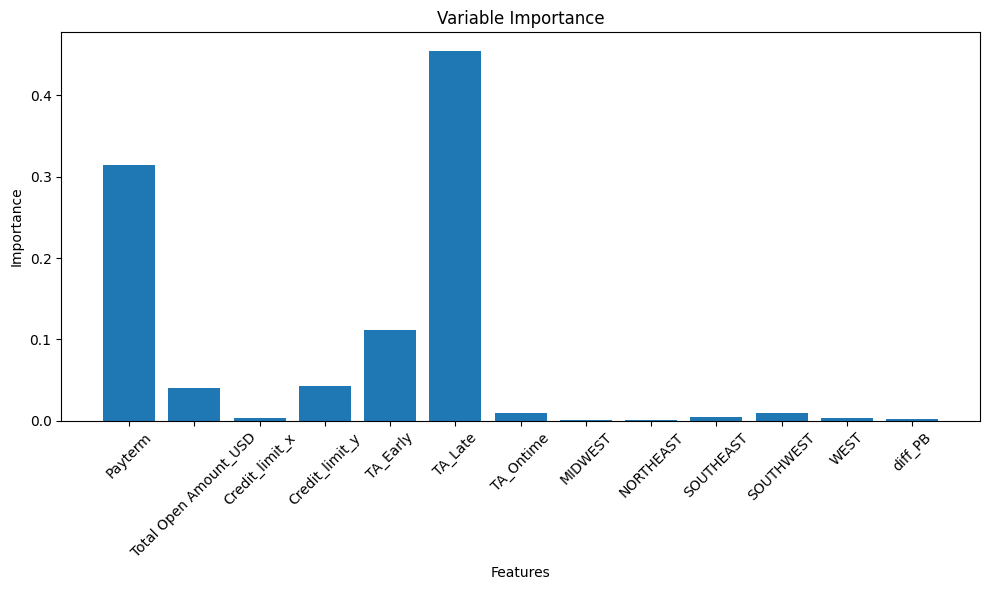

In [127]:
# Create a variable importance graph
# Get feature importances
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a variable importance graph
plt.bar(X_train_wid.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()




In [128]:
# Convert the NumPy array to a DataFrame
train_predictions = pd.DataFrame(y_train_pred)
test_predictions = pd.DataFrame(y_test_pred)
# Display the DataFrame
print(train_predictions)
print(test_predictions)

          0
0     -5.87
1     -6.39
2      2.33
3     -7.88
4     -1.26
...     ...
27995 -2.74
27996 -0.52
27997 -0.94
27998  2.53
27999 -7.04

[28000 rows x 1 columns]
          0
0     -2.14
1      6.57
2      2.62
3     -1.67
4      2.55
...     ...
11995 -1.70
11996  1.60
11997  0.13
11998  6.06
11999 -5.68

[12000 rows x 1 columns]


In [129]:
# Reset the index of the DataFrame
X_train_reset = X_train.reset_index()

# Display the DataFrame with reset index
print(X_train_reset)

       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      38015  38016 2960588404.00       12               65768.10   
1       2281   2282 2960520931.00       11               35203.60   
2      36629  36630 1928650917.00       15               13125.10   
3       6087   6088 2960612114.00       36               17741.30   
4      11792  11793 1930573728.00       15                2121.90   
...      ...    ...           ...      ...                    ...   
27995   6265   6266 1930019458.00       15                1388.90   
27996  11284  11285 1928702643.00       15               35601.40   
27997  38158  38159 1929445251.00       15               13215.00   
27998    860    861 1928589831.00       15               22466.40   
27999  15795  15796 1928725413.00       15               11380.80   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        88142.86      0.00    99.82       0.18    False   
1          

In [130]:
# Merge the DataFrames on the common column identifier
# Merge columns using concat along axis=1
merged_df_v2 = pd.concat([X_train_reset, train_predictions], axis=1)
#merged_df = pd.merge(train_predictions, X_train)

In [131]:
# Reset the index of the DataFrame
X_test_reset = X_test.reset_index()

# Display the DataFrame with reset index
print(X_test_reset)

       index     ID  Invoice ID_x  Payterm  Total Open Amount_USD  \
0      32823  32824 1929994452.00       15               24177.00   
1      16298  16299 1929646090.00       17                5208.70   
2      28505  28506 1929917929.00       15               30591.50   
3       6689   6690 1929830878.00       15               20612.40   
4      26893  26894 1930548952.00       15                9216.20   
...      ...    ...           ...      ...                    ...   
11995   3779   3780 1930548709.00       15                 481.80   
11996  11973  11974 1929209537.00       15                 223.50   
11997  35668  35669 2960601601.00       17              133705.10   
11998    483    484 1930211877.00       21               14744.00   
11999   1380   1381 2960585220.00       11                1154.40   

       Credit_limit_x  Credit_limit_y  TA_Early  TA_Late  TA_Ontime  MIDWEST  \
0               50000        79130.43      1.63    63.40      34.97    False   
1          

In [132]:
#merge x and y of test data
merged_df_test = pd.concat([X_test_reset, test_predictions], axis=1)

In [133]:
merged_df_test

,index,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,0
0,32823,32824,1929994452.00,15,24177.00,50000,79130.43,1.63,63.40,34.97,False,False,True,False,False,1,-2.14
1,16298,16299,1929646090.00,17,5208.70,100000,173207.55,44.25,47.48,8.26,False,True,False,False,False,3,6.57
2,28505,28506,1929917929.00,15,30591.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,4,2.62
3,6689,6690,1929830878.00,15,20612.40,100000,74474.47,1.79,51.44,46.77,False,False,True,False,False,2,-1.67
4,26893,26894,1930548952.00,15,9216.20,5000,44375.00,84.48,13.97,1.55,False,True,False,False,False,0,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,True,False,False,False,False,4,-1.70
11996,11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,1,1.60
11997,35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,False,False,True,False,False,3,0.13
11998,483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,False,False,True,False,False,3,6.06


In [134]:
# Merge all data set with predicted value
merged_df_all = pd.concat([merged_df_v2, merged_df_test], axis=0)

In [135]:
merged_df_all

,index,ID,Invoice ID_x,Payterm,Total Open Amount_USD,Credit_limit_x,Credit_limit_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,0
0,38015,38016,2960588404.00,12,65768.10,50000,88142.86,0.00,99.82,0.18,False,False,False,False,True,0,-5.87
1,2281,2282,2960520931.00,11,35203.60,100000,78873.24,0.35,99.61,0.04,False,False,False,True,False,1,-6.39
2,36629,36630,1928650917.00,15,13125.10,50000,81421.56,84.43,14.51,1.06,False,False,False,False,True,3,2.33
3,6087,6088,2960612114.00,36,17741.30,100000,62195.12,32.14,67.86,0.00,False,False,False,False,True,1,-7.88
4,11792,11793,1930573728.00,15,2121.90,10000,6346.15,3.38,11.67,84.95,False,True,False,False,False,1,-1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3779,3780,1930548709.00,15,481.80,100000,82040.94,1.93,50.84,47.23,True,False,False,False,False,4,-1.70
11996,11973,11974,1929209537.00,15,223.50,100000,81421.56,84.43,14.51,1.06,False,False,False,False,True,1,1.60
11997,35668,35669,2960601601.00,17,133705.10,100000,100000.00,28.28,54.13,17.59,False,False,True,False,False,3,0.13
11998,483,484,1930211877.00,21,14744.00,20000,39928.32,57.46,31.31,11.23,False,False,True,False,False,3,6.06


In [136]:
for col in Masterdata:
    print(col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
TA_Early
TA_Late
TA_Ontime
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB


In [137]:
#data head
Masterdata

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,DUNNLEVEL_y,TA_Early,TA_Late,TA_Ontime,MIDWEST,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,1.46,97.71,0.00,2.29,True,False,False,False,False,2
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,1.54,34.33,30.84,34.83,False,True,False,False,False,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,1.52,84.43,14.51,1.06,False,False,False,False,True,3
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,1.53,0.16,99.84,0.00,False,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,200762301,C&S WH trust,2019-07-25,2019,2019-07-10,2019-07-25,15,USD,84780,...,1.49,8.37,30.74,60.89,True,False,False,False,False,4
39996,U001,200769623,WAL-MAR co,2019-09-03,2019,2019-08-15,2019-08-30,15,USD,6767,...,1.52,84.43,14.51,1.06,False,False,False,False,True,4
39997,U001,200772595,SAFEW associates,2020-03-05,2020,2020-02-19,2020-03-05,15,USD,6121,...,1.49,0.00,46.98,53.02,False,False,True,False,False,3
39998,U001,200726979,BJ'S llc,2019-12-12,2019,2019-11-27,2019-12-12,15,USD,63,...,1.50,1.93,50.84,47.23,True,False,False,False,False,0


In [138]:
#merged_df_all
merged_df_all = merged_df_all.rename(columns={0 :'Predicted_value'})

In [139]:
# Join a single column from df2 to df1 based on the common identifier
Final_merge = pd.merge(Masterdata, merged_df_all[['ID','Predicted_value']], on='ID')

# Display the merged DataFrame
print(Final_merge)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [140]:
for col in Final_merge:
    print (col)

Business Code
Customer Number
Customer Name
Payment_Date
Business Year
Posting_Date
Due_Date
Payterm
Invoice Currency
Total Open Amount
USD_CURRENNCY
Total Open Amount_USD
Customer Payment Terms
Invoice ID_x
Is Open
DUNNLEVEL_x
Credit_limit_x
Baseline_Date
Region
ID
Payment_flag
payment_flagname
Invoice ID_y
Credit_limit_y
DUNNLEVEL_y
TA_Early
TA_Late
TA_Ontime
MIDWEST
NORTHEAST
SOUTHEAST
SOUTHWEST
WEST
diff_PB
Predicted_value


In [141]:
from datetime import timedelta

In [142]:
# Convert the float column to timedelta
Final_merge['Predict_Timedelta'] = pd.to_timedelta(Final_merge['Predicted_value'], unit='days')

In [143]:
# merge
Final_merge['Predict_Timedelta']

0          2 days 15:57:31.807955445
1          5 days 20:36:31.372251209
2        -2 days +22:07:34.659372643
3          2 days 14:52:51.467303979
4       -52 days +04:59:07.710839186
                    ...             
39995    -1 days +05:58:08.812960738
39996      2 days 06:45:38.300935199
39997    -2 days +15:07:21.780955226
39998    -2 days +07:12:24.842567670
39999      5 days 05:31:37.664946344
Name: Predict_Timedelta, Length: 40000, dtype: timedelta64[ns]

In [144]:
#Final_merge['Predict_Timedelta'] = Final_merge['Predict_Timedelta'].dt.days

In [145]:
Final_merge['Predict_Timedelta']

0          2 days 15:57:31.807955445
1          5 days 20:36:31.372251209
2        -2 days +22:07:34.659372643
3          2 days 14:52:51.467303979
4       -52 days +04:59:07.710839186
                    ...             
39995    -1 days +05:58:08.812960738
39996      2 days 06:45:38.300935199
39997    -2 days +15:07:21.780955226
39998    -2 days +07:12:24.842567670
39999      5 days 05:31:37.664946344
Name: Predict_Timedelta, Length: 40000, dtype: timedelta64[ns]

In [146]:
#Get date from aging days
Final_merge['Predicted_Date'] =Final_merge['Due_Date'] + Final_merge['Predict_Timedelta']

In [147]:
Final_merge['Predicted_Date']

0       2020-02-12 15:57:31.807955445
1       2019-08-16 20:36:31.372251209
2       2019-09-27 22:07:34.659372643
3       2019-11-30 14:52:51.467303979
4       2019-08-13 04:59:07.710839186
                     ...             
39995   2019-07-24 05:58:08.812960738
39996   2019-09-01 06:45:38.300935199
39997   2020-03-03 15:07:21.780955226
39998   2019-12-10 07:12:24.842567670
39999   2019-01-29 05:31:37.664946344
Name: Predicted_Date, Length: 40000, dtype: datetime64[ns]

In [148]:
# Convert the datetime column to date
Final_merge['Predicted_Date']= pd.to_datetime(Final_merge['Predicted_Date']).dt.date

In [149]:
Final_merge['Predicted_Date']

0        2020-02-12
1        2019-08-16
2        2019-09-27
3        2019-11-30
4        2019-08-13
            ...    
39995    2019-07-24
39996    2019-09-01
39997    2020-03-03
39998    2019-12-10
39999    2019-01-29
Name: Predicted_Date, Length: 40000, dtype: object

In [150]:
# Convert the 'Date' column from object to date
Final_merge['Predicted_Date'] = pd.to_datetime(Final_merge['Predicted_Date'])

In [151]:
# Get the week number
Final_merge['Predicted_Week'] = Final_merge['Predicted_Date'].dt.isocalendar().week
Final_merge['ActualPaid_week'] = Final_merge['Payment_Date'].dt.isocalendar().week

# Display the DataFrame with the week numbers
print(Final_merge)

      Business Code Customer Number       Customer Name Payment_Date  \
0              U001       200769623        WAL-MAR corp   2020-02-11   
1              U001       200980828              BEN E    2019-08-08   
2              U001       200792734          MDV/ trust   2019-12-30   
3              U001       200769623  WAL-MAR foundation   2019-11-25   
4              CA02       140106181    THE  corporation   2019-12-04   
...             ...             ...                 ...          ...   
39995          U001       200762301        C&S WH trust   2019-07-25   
39996          U001       200769623          WAL-MAR co   2019-09-03   
39997          U001       200772595    SAFEW associates   2020-03-05   
39998          U001       200726979           BJ'S  llc   2019-12-12   
39999          U001       200020431            DEC corp   2019-01-15   

       Business Year Posting_Date   Due_Date  Payterm Invoice Currency  \
0               2020   2020-01-26 2020-02-10       15        

In [153]:
suppliers_data = pd.read_excel("suppliers_data.xls")
payables_data = pd.read_excel("payables_data.xls")

In [154]:
# read the account payable csv 

df_ap=payables_data.copy()
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(df_ap), len(df_ap.columns)))
# Print the first 5 rows
df_ap.head()


Dimension data: 20000 rows and 15 columns


,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12 00:00:00,30-12-2019,2020-04-01 00:00:00,S-198,7147,2019-2020,0,Paid,Taxes,0,0,30,Domestic
1,INV-4385639898658799,16-03-2020,2020-12-03 00:00:00,NaN,16-04-2020,S-187,8575,2020-2021,75,Unpaid,Raw Material,8575,600,30,Domestic
2,INV-4586812911382721,26-12-2019,24-12-2019,2020-01-01 00:00:00,26-02-2020,S-300,6790,2019-2020,0,Paid,Raw Material,0,0,60,Domestic
3,INV-8091675473911407,14-01-2020,2020-10-01 00:00:00,NaN,14-02-2020,S-497,6575,2020-2021,137,Unpaid,Services,6575,822,30,Domestic
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12 00:00:00,20-01-2020,2020-08-03 00:00:00,S-310,12635,2019-2020,0,Paid,Raw Material,0,0,90,Domestic


In [155]:
df_ap.dtypes

Invoice Number                           object
Posting Date                             object
Invoice Date                             object
Payment Date                             object
Net Due Date (System Calculated Date)    object
Supplier ID                              object
Invoice Amount                            int64
Fiscal year                              object
Overdue                                   int64
Invoice Status                           object
Spend Category                           object
Total Outstanding amount                  int64
Late payment fees                         int64
Payterm_n                                 int64
Vendor_Type                              object
dtype: object

In [156]:
#Convert date time
#remove data with no payment date for this analysis, incase of actual problem statement use that for prediction 
# Filter and keep rows where 'column_name' is not equal to the particular value
#df_ap = df_ap[df_ap['Invoice Status'] != Paid]
df_Paid = df_ap[df_ap['Invoice Status'] != 'Unpaid']
#Unpaid 

In [157]:
# view the datatype
df_ap.dtypes

Invoice Number                           object
Posting Date                             object
Invoice Date                             object
Payment Date                             object
Net Due Date (System Calculated Date)    object
Supplier ID                              object
Invoice Amount                            int64
Fiscal year                              object
Overdue                                   int64
Invoice Status                           object
Spend Category                           object
Total Outstanding amount                  int64
Late payment fees                         int64
Payterm_n                                 int64
Vendor_Type                              object
dtype: object

In [158]:
# converting date column from object to datetime
df_Paid['Posting_Date'] = pd.to_datetime(df_Paid['Posting Date'])
df_Paid['Due_Date'] = pd.to_datetime(df_Paid['Net Due Date (System Calculated Date)'])
df_Paid['Invoice Date'] = pd.to_datetime(df_Paid['Invoice Date'])
df_Paid['Payment Date'] = pd.to_datetime(df_Paid['Payment Date'])

In [159]:
df_Paid['Invoice Amount'] = df_Paid['Invoice Amount'].astype(float).round(1)
df_Paid['Overdue'] = df_Paid['Overdue'].astype(float).round(1)
df_Paid['Total Outstanding amount'] = df_Paid['Total Outstanding amount'].astype(float).round(1)
df_Paid['Late payment fees'] = df_Paid['Late payment fees'].astype(float).round(1)
df_Paid['Payterm_n'] = df_Paid['Payterm_n'].astype(int)

In [160]:
# copying into another dataframe
Result_dp = df_Paid

In [161]:
#checking datatype for any other conversion
Result_dp.dtypes

Invoice Number                                   object
Posting Date                                     object
Invoice Date                             datetime64[ns]
Payment Date                             datetime64[ns]
Net Due Date (System Calculated Date)            object
Supplier ID                                      object
Invoice Amount                                  float64
Fiscal year                                      object
Overdue                                         float64
Invoice Status                                   object
Spend Category                                   object
Total Outstanding amount                        float64
Late payment fees                               float64
Payterm_n                                         int32
Vendor_Type                                      object
Posting_Date                             datetime64[ns]
Due_Date                                 datetime64[ns]
dtype: object

In [162]:
# creating ID column
Result_dp['ID'] = range(1, len(Result_dp) + 1)

In [163]:
Result_dp

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987


In [164]:
##Calculate Aging
Result_dp['Payment_flag'] = Result_dp['Due_Date'] - Result_dp['Payment Date']

In [165]:
# converting days aging to integer
Result_dp['Payment_flag'] = pd.to_numeric(Result_dp['Payment_flag'].dt.days, downcast='integer')

In [166]:
# early,late ontime flag, this will be needed when we create customer level features
conditions = [
    (Result_dp['Payment_flag'] == 0 ),
    (Result_dp['Payment_flag'] < 0 ),
    (Result_dp['Payment_flag'] > 0)]
choices = ['ontime', 'late', 'early']
Result_dp['payment_flagname'] = np.select(conditions, choices, default='NA')
print(Result_dp)


             Invoice Number         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
2      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
4      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
5      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
7       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
19993  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
19994  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
19996   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
19998  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
19999  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [167]:
Result_dp['payment_flagname'].value_counts()

payment_flagname
early     7795
late      6074
ontime     119
Name: count, dtype: int64

In [168]:
##creating customer level features
## % Late, % Early, % Amount Value 
vendor_pivot = Result_dp.groupby(
    ['Supplier ID', 'payment_flagname']
).agg(
    {
        # Find the min, max, and sum 
        'Invoice Amount': "sum",
        'Late payment fees':'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()


In [169]:
vendor_pivot_others = Result_dp.groupby(
    ['Supplier ID']
).agg(
    {
        # Find the min, max, and sum 
        'Late payment fees':'mean',
        'Invoice Number': "count",
        'Overdue': "mean"
    }
).reset_index()

In [170]:
# Pivot the DataFrame based on column 'A', keeping columns 'B', 'C' as is
reshaped_dataAP = vendor_pivot.pivot(index=['Supplier ID'], columns='payment_flagname', values='Invoice Amount')

# Display the pivoted DataFrame
print(reshaped_dataAP)

payment_flagname     early      late   ontime
Supplier ID                                  
S-1               20114.00  33361.00 29647.00
S-10             195686.00 177684.00 18049.00
S-100             64792.00  49186.00      NaN
S-101            102777.00  81315.00 18720.00
S-102            186727.00 105914.00      NaN
...                    ...       ...      ...
S-95             143218.00 122706.00      NaN
S-96             199677.00  94972.00 13836.00
S-97              56813.00 110131.00      NaN
S-98             154104.00 134706.00      NaN
S-99             230768.00  66565.00      NaN

[500 rows x 3 columns]


In [171]:
# fill na with 0
df_filled_ap = reshaped_dataAP.fillna(0)

In [172]:
print(df_filled_ap)

payment_flagname     early      late   ontime
Supplier ID                                  
S-1               20114.00  33361.00 29647.00
S-10             195686.00 177684.00 18049.00
S-100             64792.00  49186.00     0.00
S-101            102777.00  81315.00 18720.00
S-102            186727.00 105914.00     0.00
...                    ...       ...      ...
S-95             143218.00 122706.00     0.00
S-96             199677.00  94972.00 13836.00
S-97              56813.00 110131.00     0.00
S-98             154104.00 134706.00     0.00
S-99             230768.00  66565.00     0.00

[500 rows x 3 columns]


In [173]:
# Calculate row sums
row_sums_ap= df_filled_ap.sum(axis=1)

In [174]:
# taking percent split at vendor level, same as done for AR
df_percent_ap = df_filled_ap.div(row_sums_ap, axis=0) * 100

In [175]:

df_ap_others = vendor_pivot_others.loc[:, ['Supplier ID','Invoice Number','Late payment fees','Overdue']]
print(df_ap_others)

    Supplier ID  Invoice Number  Late payment fees  Overdue
0           S-1              36             187.11    25.61
1          S-10              32              49.59     8.75
2         S-100              23             145.48    22.91
3         S-101              18             131.89    21.83
4         S-102              24              38.50     6.67
..          ...             ...                ...      ...
495        S-95              23             121.61    22.13
496        S-96              25              57.08     8.56
497        S-97              28             119.04    15.36
498        S-98              26             119.62    18.62
499        S-99              24              33.75     6.58

[500 rows x 4 columns]


In [176]:
merged_df_ap = pd.merge(df_percent_ap, df_ap_others, on='Supplier ID')

In [177]:
merged_df_ap

,Supplier ID,early,late,ontime,Invoice Number,Late payment fees,Overdue
0,S-1,24.20,40.13,35.67,36,187.11,25.61
1,S-10,49.99,45.39,4.61,32,49.59,8.75
2,S-100,56.85,43.15,0.00,23,145.48,22.91
3,S-101,50.68,40.09,9.23,18,131.89,21.83
4,S-102,63.81,36.19,0.00,24,38.50,6.67
...,...,...,...,...,...,...,...
495,S-95,53.86,46.14,0.00,23,121.61,22.13
496,S-96,64.73,30.79,4.49,25,57.08,8.56
497,S-97,34.03,65.97,0.00,28,119.04,15.36
498,S-98,53.36,46.64,0.00,26,119.62,18.62


In [178]:
Result_dp

,Invoice Number,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue,Invoice Status,Spend Category,Total Outstanding amount,Late payment fees,Payterm_n,Vendor_Type,Posting_Date,Due_Date,ID,Payment_flag,payment_flagname
0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,Paid,Taxes,0.00,0.00,30,Domestic,2019-04-12,2020-04-01,1,93,early
2,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,60,Domestic,2019-12-26,2020-02-26,2,56,early
4,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-08-12,2020-08-03,3,196,early
5,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,Paid,Services,0.00,0.00,30,Domestic,2019-11-03,2019-11-04,4,225,early
7,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,Paid,Raw Material,0.00,402.00,30,Domestic,2019-07-18,2019-08-18,5,-67,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,INV-2094234150697486,2019-05-02 00:00:00,2019-04-02,2019-03-14,2019-05-03 00:00:00,S-434,11870.00,2019-2020,9.00,Paid,Raw Material,0.00,63.00,30,Domestic,2019-05-02,2019-05-03,13984,50,early
19994,INV-9971508041177690,2019-03-04 00:00:00,2019-03-29,2019-03-05,2019-03-07 00:00:00,S-154,5444.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-04,2019-03-07,13985,2,early
19996,INV-923263686839893,2019-03-06 00:00:00,2019-03-06,2019-08-20,2019-03-09 00:00:00,S-449,13346.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-03-06,2019-03-09,13986,-164,late
19998,INV-5306060259604092,2019-01-05 00:00:00,2019-01-05,2019-06-27,2019-01-08 00:00:00,S-158,13400.00,2019-2020,0.00,Paid,Raw Material,0.00,0.00,90,Domestic,2019-01-05,2019-01-08,13987,-170,late


In [179]:
##Join invoice level features with customer data
Masterdata_ap = pd.merge(Result_dp, merged_df_ap, on='Supplier ID', how='left')

# Print the master DataFrame
print(Masterdata_ap)

           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [180]:
# Convert the categorical column into dummy variables
dummy_df_ap= pd.get_dummies(Masterdata_ap[['Spend Category','Vendor_Type']])

In [181]:
# Concatenate the original DataFrame with the dummy variables
Masterdata_ap = pd.concat([Masterdata_ap, dummy_df_ap], axis=1)

# Print the updated DataFrame
print(Masterdata_ap)

           Invoice Number_x         Posting Date Invoice Date Payment Date  \
0      INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   2019-12-30   
1      INV-4586812911382721           26-12-2019   2019-12-24   2020-01-01   
2      INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   2020-01-20   
3      INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   2019-03-24   
4       INV-576255376736098           18-07-2019   2019-07-15   2019-10-24   
...                     ...                  ...          ...          ...   
13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   2019-03-14   
13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   2019-03-05   
13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   2019-08-20   
13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   2019-06-27   
13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   2019-04-13   

      Net Due Date (System Calculated Date) Supplier ID  Invoic

In [182]:
Masterdata_ap['diff_PB'] = Masterdata_ap['Posting_Date'] - Masterdata_ap['Invoice Date']

In [183]:
# Assuming you have a DataFrame called 'df' and a column called 'days'
Masterdata_ap['diff_PB'] =  pd.to_numeric(Masterdata_ap['diff_PB'].dt.days, downcast='integer')

In [184]:
Model_columns_ap = Masterdata_ap.loc[:, ['ID','Invoice Number_x', 'diff_PB', 'Spend Category_Fees',
                                         'Spend Category_Raw Material','Spend Category_Services','Spend Category_Taxes',
                          'Spend Category_Utility', 'Overdue_y','Payterm_n','Vendor_Type_Domestic','Vendor_Type_International', 'Late payment fees_y','Invoice Number_y','early','late','ontime',
                           'Payment_flag','Invoice Amount']]

In [185]:
non_numeric_cols = Model_columns_ap.select_dtypes(exclude=[np.number]).columns
Model_columns_ap = Model_columns_ap.drop(columns=non_numeric_cols)

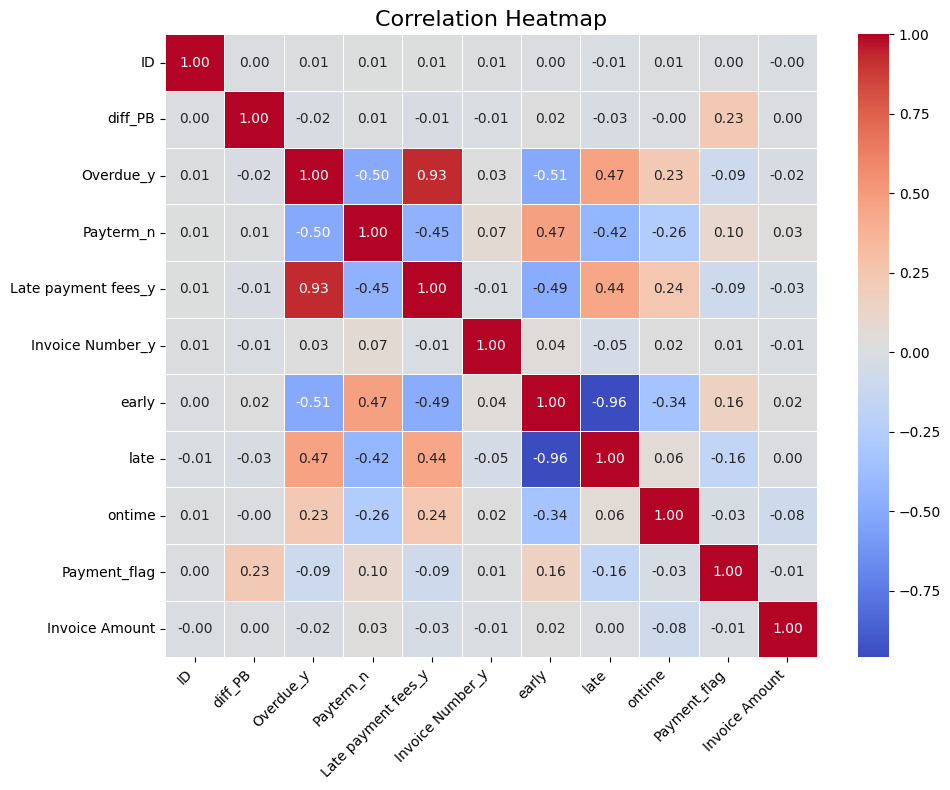

In [186]:
corr_matrix = Model_columns_ap.corr()

# Set up the size of the heatmap for better visualization
plt.figure(figsize=(10, 8))

# Create a correlation plot using seaborn with clearer color map (coolwarm)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust the layout for better aesthetics
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [187]:
# Find columns with correlation greater than 0.8
high_corr_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Drop the columns with high correlation
Model_columns_ap_new = Model_columns_ap.drop(high_corr_columns, axis=1)

print(Model_columns_ap_new)

          ID  diff_PB  Overdue_y  Payterm_n  Invoice Number_y  early  ontime  \
0          1        0       5.59         30                17  57.95    0.00   
1          2        2      11.52         60                27  55.11    5.57   
2          3      122       8.53         90                32  58.04    0.00   
3          4        0      14.50         30                30  56.36    0.00   
4          5        3      22.74         30                23  55.89    0.00   
...      ...      ...        ...        ...               ...    ...     ...   
13983  13984       30      13.28         30                25  52.90    0.00   
13984  13985      -25       7.15         90                26  67.85    0.00   
13985  13986        0       2.40         90                25  44.35    0.00   
13986  13987        0       6.16         90                25  68.57    0.00   
13987  13988      -53      15.33         90                24  61.42    0.00   

       Payment_flag  Invoice Amount  
0

In [188]:
#Model_columns
Model_columns_AP1 = Model_columns_ap_new.fillna(0)

In [189]:
# Assuming you have a pandas DataFrame named 'df' containing your data
Model_columns_AP1

# Split the data into features (X) and target variable (y)
X_AP = Model_columns_AP1.drop('Payment_flag', axis=1)
y_AP = Model_columns_AP1['Payment_flag']

# Split the data into train and test sets
X_trainap, X_testap, y_trainap, y_testap = train_test_split(X_AP, y_AP, test_size=0.3, random_state=42)

In [190]:
print(X_trainap.columns)


Index(['ID', 'diff_PB', 'Overdue_y', 'Payterm_n', 'Invoice Number_y', 'early',
       'ontime', 'Invoice Amount'],
      dtype='object')


In [191]:
X_train_ap = X_trainap.drop(['ID'], axis=1)
X_test_ap = X_testap.drop(['ID'], axis=1)


In [192]:
# Create a gradient boosting regression model
model_gb_ap = GradientBoostingRegressor()

# Fit the model to the training data
model_gb_ap.fit(X_train_ap, y_trainap)

importances_ap = model_gb_ap.feature_importances_

# Predict on the training and test data
y_train_predap = model_gb_ap.predict(X_train_ap)
y_test_predap = model_gb_ap.predict(X_test_ap)

# Evaluate the model using R-squared and mean squared error
train_r2ap = r2_score(y_trainap, y_train_predap)
test_r2ap = r2_score(y_testap, y_test_predap)
train_mseap = mean_squared_error(y_trainap, y_train_predap)
test_mseap = mean_squared_error(y_testap, y_test_predap)

print("Training R-squared:", train_r2ap)
print("Test R-squared:", test_r2ap)
print("Training Mean Squared Error (MSE):", train_mseap)
print("Test Mean Squared Error (MSE):", test_mseap)

Training R-squared: 0.16826627087157298
Test R-squared: 0.13199962259729492
Training Mean Squared Error (MSE): 13149.48942969322
Test Mean Squared Error (MSE): 13852.38899754041


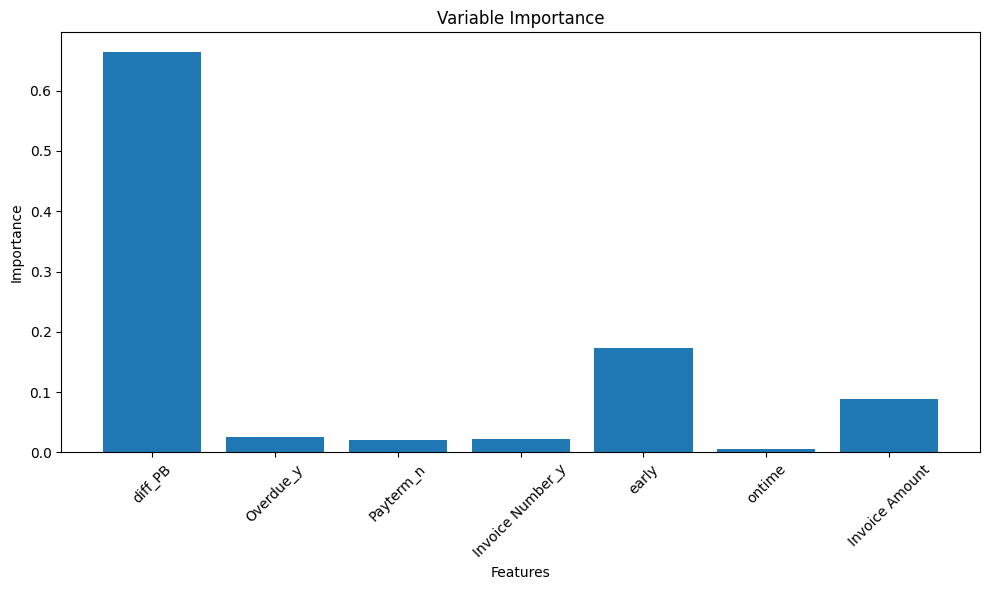

In [193]:
# Create a variable importance graph
# Get feature importances
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a variable importance graph
plt.bar(X_train_ap.columns, importances_ap)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

In [194]:
# Convert the NumPy array to a DataFrame
train_predictions_ap = pd.DataFrame(y_train_predap)
test_predictions_ap = pd.DataFrame(y_test_predap)
# Display the DataFrame
print(train_predictions_ap)
print(test_predictions_ap)

          0
0     50.29
1     34.64
2     28.52
3     21.84
4     98.26
...     ...
9786  15.30
9787 -19.13
9788  -3.82
9789  26.47
9790 -51.67

[9791 rows x 1 columns]
          0
0     33.67
1    -20.29
2     31.42
3     -3.96
4     20.87
...     ...
4192 -11.70
4193  -5.58
4194  10.64
4195  56.41
4196  32.34

[4197 rows x 1 columns]


In [195]:
# Reset the index of the DataFrame
X_train_reset = X_train_ap.reset_index()

# Display the DataFrame with reset index
print(X_train_reset)

      index  diff_PB  Overdue_y  Payterm_n  Invoice Number_y  early  ontime  \
0      7798       92      20.50         30                34  56.65    0.00   
1     11830        2       8.56         90                25  64.73    4.49   
2     12947        3       6.14         90                29  55.83    0.00   
3      5500        2       9.65         90                37  62.23    0.00   
4      5888      153      11.07         90                29  56.62    0.00   
...     ...      ...        ...        ...               ...    ...     ...   
9786   5191        0       5.87         90                30  58.86    0.00   
9787  13418       90      11.38         90                37  60.57    0.00   
9788   5390        0       8.25         90                32  55.06    0.00   
9789    860        4       7.00         60                25  73.43    2.99   
9790   7270      -84       6.23         90                35  69.89    0.00   

      Invoice Amount  
0           17074.00  
1    

In [196]:
# Merge the DataFrames on the common column identifier
# Merge columns using concat along axis=1
merged_df_v2_ap = pd.concat([X_train_reset, train_predictions_ap], axis=1)
#merged_df = pd.merge(train_predictions, X_train)

In [197]:
# Reset the index of the DataFrame
X_test_reset_ap = X_test_ap.reset_index()

# Display the DataFrame with reset index
print(X_test_reset_ap)

      index  diff_PB  Overdue_y  Payterm_n  Invoice Number_y  early  ontime  \
0      9568      151      10.48         90                42  61.53    0.00   
1     11364        0      24.40          0                25  22.84   33.78   
2     11565        3       6.82         90                33  71.71    0.00   
3      3798        1      15.67         60                39  55.49    0.00   
4     12414        5      17.12         60                24  66.81    2.94   
...     ...      ...        ...        ...               ...    ...     ...   
4192   3265        0      10.49         60                35  50.06    0.00   
4193  11796        4      11.12         30                25  53.82    0.00   
4194  11156        0       7.79         30                28  58.97    0.00   
4195   7624       30       6.76         90                34  56.45    0.00   
4196   9006        1       6.82         90                33  71.71    0.00   

      Invoice Amount  
0           14388.00  
1    

In [198]:
merged_df_test_ap = pd.concat([X_test_reset_ap, test_predictions_ap], axis=1)

In [199]:
merged_df_all_ap = pd.concat([merged_df_v2_ap, merged_df_test_ap], axis=0)

In [200]:
#merged_df_all
merged_df_all_ap = merged_df_all_ap.rename(columns={0 :'Predicted_value'})

In [201]:
#Masterdata_ap[Masterdata_ap['ID'] == 7799]
Masterdata_ap = Masterdata_ap.reset_index()

In [202]:
# Join a single column from df2 to df1 based on the common identifier
Final_merge_ap = pd.merge(Masterdata_ap, merged_df_all_ap[['index','Predicted_value']], on='index')

# Display the merged DataFrame
print(Final_merge_ap)

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [203]:
# Convert the float column to timedelta
Final_merge_ap['Predict_Timedelta'] = pd.to_timedelta(Final_merge_ap['Predicted_value'], unit='days')

In [204]:
Final_merge_ap['Predicted_Date'] =Final_merge_ap['Due_Date'] + Final_merge_ap['Predict_Timedelta']

In [205]:
# Convert the datetime column to date
Final_merge_ap['Predicted_Date']= pd.to_datetime(Final_merge_ap['Predicted_Date']).dt.date

In [206]:
# Convert the 'Date' column from object to date
Final_merge_ap['Predicted_Date'] = pd.to_datetime(Final_merge_ap['Predicted_Date'])

In [207]:
print(Final_merge_ap)

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [208]:
# Get the week number
Final_merge_ap['Predicted_Week'] = Final_merge_ap['Predicted_Date'].dt.isocalendar().week
Final_merge_ap['ActualPaid_Week'] = Final_merge_ap['Payment Date'].dt.isocalendar().week
# Display the DataFrame with the week numbers
print(Final_merge_ap)

       index      Invoice Number_x         Posting Date Invoice Date  \
0          0  INV-5978675602067198  2019-04-12 00:00:00   2019-04-12   
1          1  INV-4586812911382721           26-12-2019   2019-12-24   
2          2  INV-9623721287362728  2019-08-12 00:00:00   2019-04-12   
3          3  INV-6391763768436907  2019-11-03 00:00:00   2019-11-03   
4          4   INV-576255376736098           18-07-2019   2019-07-15   
...      ...                   ...                  ...          ...   
13983  13983  INV-2094234150697486  2019-05-02 00:00:00   2019-04-02   
13984  13984  INV-9971508041177690  2019-03-04 00:00:00   2019-03-29   
13985  13985   INV-923263686839893  2019-03-06 00:00:00   2019-03-06   
13986  13986  INV-5306060259604092  2019-01-05 00:00:00   2019-01-05   
13987  13987  INV-3588784185880170  2019-01-03 00:00:00   2019-02-25   

      Payment Date Net Due Date (System Calculated Date) Supplier ID  \
0       2019-12-30                   2020-04-01 00:00:00       

In [209]:
Final_merge_ap['ActualPaid_Week'] = Final_merge_ap['ActualPaid_Week'].astype('int64')
Final_merge_ap['Predicted_Week'] = Final_merge_ap['Predicted_Week'].astype('int64')

In [210]:
excel_file_name = "output.xlsx"
Final_merge_ap.to_excel(excel_file_name, index=False)

In [213]:
Final_merge_ap.head()

,index,Invoice Number_x,Posting Date,Invoice Date,Payment Date,Net Due Date (System Calculated Date),Supplier ID,Invoice Amount,Fiscal year,Overdue_x,...,Spend Category_Taxes,Spend Category_Utility,Vendor_Type_Domestic,Vendor_Type_International,diff_PB,Predicted_value,Predict_Timedelta,Predicted_Date,Predicted_Week,ActualPaid_Week
0,0,INV-5978675602067198,2019-04-12 00:00:00,2019-04-12,2019-12-30,2020-04-01 00:00:00,S-198,7147.00,2019-2020,0.00,...,True,False,True,False,0,14.36,14 days 08:40:35.350464475,2020-04-15,16,1
1,1,INV-4586812911382721,26-12-2019,2019-12-24,2020-01-01,26-02-2020,S-300,6790.00,2019-2020,0.00,...,False,False,True,False,2,10.60,10 days 14:29:51.095255818,2020-03-07,10,1
2,2,INV-9623721287362728,2019-08-12 00:00:00,2019-04-12,2020-01-20,2020-08-03 00:00:00,S-310,12635.00,2019-2020,0.00,...,False,False,True,False,122,75.59,75 days 14:08:00.001203371,2020-10-17,42,4
3,3,INV-6391763768436907,2019-11-03 00:00:00,2019-11-03,2019-03-24,2019-11-04 00:00:00,S-191,6808.00,2019-2020,0.00,...,False,False,True,False,0,9.47,9 days 11:14:58.412019736,2019-11-13,46,12
4,4,INV-576255376736098,18-07-2019,2019-07-15,2019-10-24,18-08-2019,S-222,5834.00,2019-2020,67.00,...,False,False,True,False,3,-1.41,-2 days +14:02:42.168458259,2019-08-16,33,43


In [214]:
for col in Final_merge_ap:
    print(col)

index
Invoice Number_x
Posting Date
Invoice Date
Payment Date
Net Due Date (System Calculated Date)
Supplier ID
Invoice Amount
Fiscal year
Overdue_x
Invoice Status
Spend Category
Total Outstanding amount
Late payment fees_x
Payterm_n
Vendor_Type
Posting_Date
Due_Date
ID
Payment_flag
payment_flagname
early
late
ontime
Invoice Number_y
Late payment fees_y
Overdue_y
Spend Category_Fees
Spend Category_Raw Material
Spend Category_Services
Spend Category_Taxes
Spend Category_Utility
Vendor_Type_Domestic
Vendor_Type_International
diff_PB
Predicted_value
Predict_Timedelta
Predicted_Date
Predicted_Week
ActualPaid_Week


# WCO Calculations

In [215]:
Final_merge.head()

,Business Code,Customer Number,Customer Name,Payment_Date,Business Year,Posting_Date,Due_Date,Payterm,Invoice Currency,Total Open Amount,...,NORTHEAST,SOUTHEAST,SOUTHWEST,WEST,diff_PB,Predicted_value,Predict_Timedelta,Predicted_Date,Predicted_Week,ActualPaid_week
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,2020-01-26,2020-02-10,15,USD,54273,...,False,False,False,True,3,2.66,2 days 15:57:31.807955445,2020-02-12,7,7
1,U001,200980828,BEN E,2019-08-08,2019,2019-07-22,2019-08-11,20,USD,79657,...,False,False,False,False,2,5.86,5 days 20:36:31.372251209,2019-08-16,33,32
2,U001,200792734,MDV/ trust,2019-12-30,2019,2019-09-14,2019-09-29,15,USD,2254,...,True,False,False,False,0,-1.08,-2 days +22:07:34.659372643,2019-09-27,39,1
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,2019-11-13,2019-11-28,15,USD,33133,...,False,False,False,True,3,2.62,2 days 14:52:51.467303979,2019-11-30,48,48
4,CA02,140106181,THE corporation,2019-12-04,2019,2019-09-20,2019-10-04,14,CAD,22226,...,False,True,False,False,4,-51.79,-52 days +04:59:07.710839186,2019-08-13,33,49


In [216]:
# Select columns 'B' and 'D' using loc accessor
Week_AR = Final_merge.loc[:, ['Predicted_Week', 'Total Open Amount_USD']]

Week_AP = Final_merge_ap.loc[:, ['Predicted_Week', 'Invoice Amount']]

In [217]:
Week_AR

,Predicted_Week,Total Open Amount_USD
0,7,54273.30
1,33,79656.60
2,39,2253.90
3,48,33133.30
4,33,16447.10
...,...,...
39995,30,84780.40
39996,35,6766.50
39997,10,6120.90
39998,50,63.50


In [218]:
Week_AP

,Predicted_Week,Invoice Amount
0,16,7147.00
1,10,6790.00
2,42,12635.00
3,46,6808.00
4,33,5834.00
...,...,...
13983,24,11870.00
13984,9,5444.00
13985,10,13346.00
13986,6,13400.00


In [219]:
APBYWEEK = Week_AP.groupby(
    ['Predicted_Week']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'Invoice Amount':'sum',
    }
).reset_index()

In [220]:
ARBYWEEK = Week_AR.groupby(
    ['Predicted_Week']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'Total Open Amount_USD':'sum',
    }
).reset_index()

In [221]:
new_column_names_ar = {'Total Open Amount_USD': 'Amount_AR'}
ARBYWEEK.rename(columns = new_column_names_ar,inplace = True)
print(ARBYWEEK)

    Predicted_Week   Amount_AR
0                1  8979590.20
1                2  7462215.50
2                3 25641480.80
3                4 33857132.40
4                5 35712760.70
5                6 38852072.90
6                7 37756602.90
7                8 37900236.90
8                9 37268964.50
9               10 35874643.50
10              11 34630372.80
11              12 23240276.20
12              13 22627468.60
13              14 19173783.40
14              15 22667038.00
15              16 21464747.60
16              17 22387160.60
17              18 22365314.70
18              19 20997489.10
19              20 22432403.30
20              21 23072721.70
21              22 20404381.20
22              23 21210994.10
23              24 21711354.20
24              25 20956866.40
25              26 21721554.10
26              27 25789924.40
27              28 22648209.00
28              29 20199158.70
29              30 19123549.70
30              31 19415664.80
31      

In [222]:
new_column_names_ap = {'Invoice Amount': 'Amount_AP'}
APBYWEEK.rename(columns = new_column_names_ap,inplace = True)
print(APBYWEEK)

    Predicted_Week  Amount_AP
0                1 4116301.00
1                2 3736220.00
2                3 3835194.00
3                4 4117669.00
4                5 3980279.00
5                6 3290815.00
6                7 3538184.00
7                8 3370643.00
8                9 3499747.00
9               10 3215973.00
10              11 2760282.00
11              12 2952921.00
12              13 2584268.00
13              14 2840904.00
14              15 2603652.00
15              16 2649886.00
16              17 2332950.00
17              18 2353520.00
18              19 2330940.00
19              20 2458410.00
20              21 2493621.00
21              22 2238612.00
22              23 2178747.00
23              24 2638365.00
24              25 2778901.00
25              26 2830937.00
26              27 2518921.00
27              28 2362799.00
28              29 2993407.00
29              30 2743498.00
30              31 3138815.00
31              32 2437444.00
32        

In [223]:
ARBYWEEK_AMNT = ARBYWEEK.loc[:, ['Amount_AR']]
APBYWEEK_AMNT = APBYWEEK.loc[:, ['Amount_AP']]

In [224]:
WCOBYWEEK_1 = pd.merge(ARBYWEEK, APBYWEEK, on='Predicted_Week')

In [225]:
new_column_names_wco = {'Total Open Amount_USD': 'Amount_AR','Invoice Amount': 'Amount_AP'}
WCOBYWEEK_1.rename(columns = new_column_names_wco,inplace = True)
print(WCOBYWEEK_1)

    Predicted_Week   Amount_AR  Amount_AP
0                1  8979590.20 4116301.00
1                2  7462215.50 3736220.00
2                3 25641480.80 3835194.00
3                4 33857132.40 4117669.00
4                5 35712760.70 3980279.00
5                6 38852072.90 3290815.00
6                7 37756602.90 3538184.00
7                8 37900236.90 3370643.00
8                9 37268964.50 3499747.00
9               10 35874643.50 3215973.00
10              11 34630372.80 2760282.00
11              12 23240276.20 2952921.00
12              13 22627468.60 2584268.00
13              14 19173783.40 2840904.00
14              15 22667038.00 2603652.00
15              16 21464747.60 2649886.00
16              17 22387160.60 2332950.00
17              18 22365314.70 2353520.00
18              19 20997489.10 2330940.00
19              20 22432403.30 2458410.00
20              21 23072721.70 2493621.00
21              22 20404381.20 2238612.00
22              23 21210994.10 217

In [226]:
WCOBYWEEK_1['Working_Capital'] = WCOBYWEEK_1['Amount_AR'] - WCOBYWEEK_1['Amount_AP']

In [227]:
WCOBYWEEK_1

,Predicted_Week,Amount_AR,Amount_AP,Working_Capital
0,1,8979590.20,4116301.00,4863289.20
1,2,7462215.50,3736220.00,3725995.50
2,3,25641480.80,3835194.00,21806286.80
3,4,33857132.40,4117669.00,29739463.40
4,5,35712760.70,3980279.00,31732481.70
5,6,38852072.90,3290815.00,35561257.90
6,7,37756602.90,3538184.00,34218418.90
7,8,37900236.90,3370643.00,34529593.90
8,9,37268964.50,3499747.00,33769217.50
9,10,35874643.50,3215973.00,32658670.50
